In [46]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import CSVLogger

In [2]:
def read_data():
    digit_trn = np.genfromtxt('binMNIST_data/bindigit_trn.csv', delimiter=',')
    digit_tst = np.genfromtxt('binMNIST_data/bindigit_tst.csv', delimiter=',')
    target_trn = np.genfromtxt('binMNIST_data/targetdigit_trn.csv', delimiter=',')
    target_tst = np.genfromtxt('binMNIST_data/targetdigit_tst.csv', delimiter=',')
    
    return (digit_trn, digit_tst, target_trn, target_tst)
    

In [3]:
X_train, X_test, y_train, y_test = read_data()

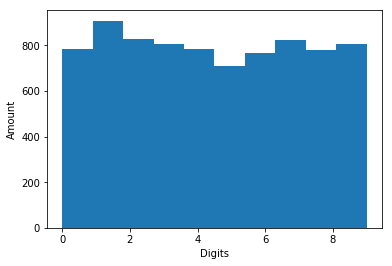

In [44]:
plt.hist(y_train)
plt.xlabel('Digits')
plt.ylabel('Amount')
plt.savefig('histy')
plt.show()

## 3.1 Autoencoder for binary-type MNIST images

In [5]:
## Size 50

hidden_layer_size = 50 

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded50 = Dense(hidden_layer_size, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded50 = Dense(784, activation='sigmoid')(encoded50)

# this model maps an input to its reconstruction
autoencoder50 = Model(input_img, decoded50)

# this model maps an input to its encoded representation
encoder50 = Model(input_img, encoded50)

autoencoder50.compile(optimizer='adadelta', loss='mean_squared_error')

In [6]:
## Size 80

hidden_layer_size = 80

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded80 = Dense(hidden_layer_size, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded80 = Dense(784, activation='sigmoid')(encoded80)

# this model maps an input to its reconstruction
autoencoder80 = Model(input_img, decoded80)

# this model maps an input to its encoded representation
encoder80 = Model(input_img, encoded80)

autoencoder80.compile(optimizer='adadelta', loss='mean_squared_error')

In [7]:
## Size 120

hidden_layer_size = 120

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded120 = Dense(hidden_layer_size, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded120 = Dense(784, activation='sigmoid')(encoded120)

# this model maps an input to its reconstruction
autoencoder120 = Model(input_img, decoded120)

# this model maps an input to its encoded representation
encoder120 = Model(input_img, encoded120)

autoencoder120.compile(optimizer='adadelta', loss='mean_squared_error')

In [45]:
trained50 = autoencoder50.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                verbose=1,
                validation_data=(X_test, X_test))

trained80 = autoencoder80.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                verbose=1,
                validation_data=(X_test, X_test))

trained120 = autoencoder120.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                verbose=1,
                validation_data=(X_test, X_test))



Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 0s 21us/step - loss: 0.0668 - val_loss: 0.0662
Epoch 2/50
8000/8000 [==============================] - 0s 20us/step - loss: 0.0664 - val_loss: 0.0658
Epoch 3/50
8000/8000 [==============================] - 0s 19us/step - loss: 0.0660 - val_loss: 0.0654
Epoch 4/50
8000/8000 [==============================] - 0s 20us/step - loss: 0.0656 - val_loss: 0.0650
Epoch 5/50
8000/8000 [==============================] - 0s 21us/step - loss: 0.0652 - val_loss: 0.0647
Epoch 6/50
8000/8000 [==============================] - 0s 20us/step - loss: 0.0649 - val_loss: 0.0643
Epoch 7/50
8000/8000 [==============================] - 0s 20us/step - loss: 0.0645 - val_loss: 0.0639
Epoch 8/50
8000/8000 [==============================] - 0s 20us/step - loss: 0.0641 - val_loss: 0.0636
Epoch 9/50
8000/8000 [==============================] - 0s 20us/step - loss: 0.0638 - val_loss: 0.0632
Epoch 10/50
8000/8000 [==

8000/8000 [==============================] - 0s 23us/step - loss: 0.0550 - val_loss: 0.0548
Epoch 30/50
8000/8000 [==============================] - 0s 25us/step - loss: 0.0548 - val_loss: 0.0545
Epoch 31/50
8000/8000 [==============================] - 0s 24us/step - loss: 0.0545 - val_loss: 0.0543
Epoch 32/50
8000/8000 [==============================] - 0s 29us/step - loss: 0.0543 - val_loss: 0.0541
Epoch 33/50
8000/8000 [==============================] - 0s 22us/step - loss: 0.0541 - val_loss: 0.0539
Epoch 34/50
8000/8000 [==============================] - 0s 23us/step - loss: 0.0539 - val_loss: 0.0536
Epoch 35/50
8000/8000 [==============================] - 0s 22us/step - loss: 0.0536 - val_loss: 0.0534
Epoch 36/50
8000/8000 [==============================] - 0s 20us/step - loss: 0.0534 - val_loss: 0.0532
Epoch 37/50
8000/8000 [==============================] - 0s 20us/step - loss: 0.0532 - val_loss: 0.0530
Epoch 38/50
8000/8000 [==============================] - 0s 20us/step - loss

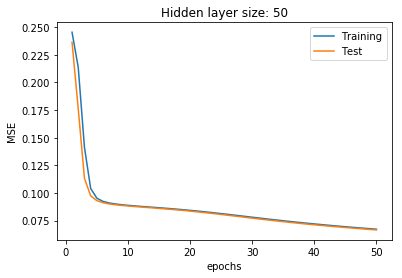

In [40]:
loss50 = trained50.history['loss']
test_loss50 = trained50.history['val_loss']
plt.plot(range(1, 51), loss50, label="Training")
plt.plot(range(1, 51), test_loss50, label="Test")
plt.title('Hidden layer size: 50')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.savefig('hidden_layer50.png')
plt.show()

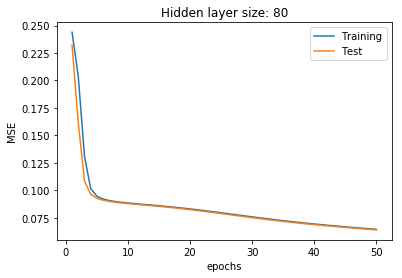

In [41]:
loss80 = trained80.history['loss']
test_loss80 = trained80.history['val_loss']
plt.plot(range(1, 51), loss80, label="Training")
plt.plot(range(1, 51), test_loss80, label="Test")
plt.title('Hidden layer size: 80')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.savefig('hidden_layer80.png')
plt.show()

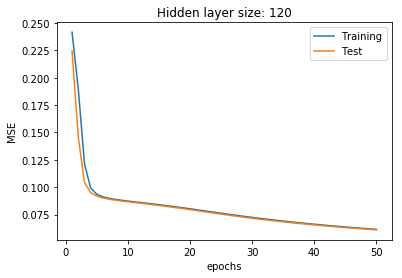

In [42]:
loss120 = trained120.history['loss']
test_loss120 = trained120.history['val_loss']
plt.plot(range(1, 51), loss120, label="Training")
plt.plot(range(1, 51), test_loss120, label="Test")
plt.title('Hidden layer size: 120')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend()
plt.savefig('hidden_layer120.png')
plt.show()

In [18]:
def plotWeights(weights):
    n = weights.shape[0]  # how many digits we will display
    if n > 100:
        n=100
    plt.figure(figsize=(20, 20))
    for i in range(n):
        # display weights
        ax = plt.subplot(10, 10, i + 1)
        plt.imshow(weights[i].reshape(28, 28))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    

In [25]:
def plot_images(images,predictions):
    plt.figure(figsize=(20, 4))
    n = len(images)
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(predictions[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    

In [20]:
prediction50 = autoencoder50.predict(X_test)
prediction80 = autoencoder80.predict(X_test)
prediction120 = autoencoder120.predict(X_test)

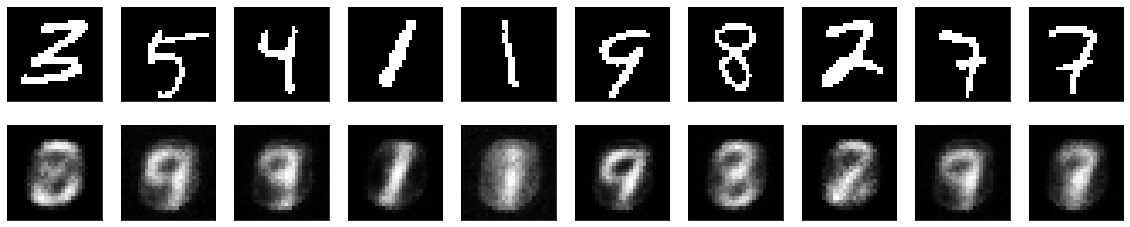

In [26]:
plot_images(X_test[:10, :], prediction50[:10, :])
plt.savefig('images50.png')
plt.show()   

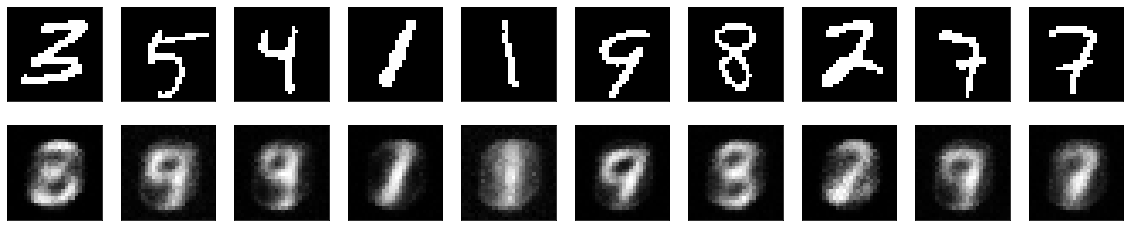

In [27]:
plot_images(X_test[:10, :], prediction80[:10, :])
plt.savefig('images80.png')
plt.show()   

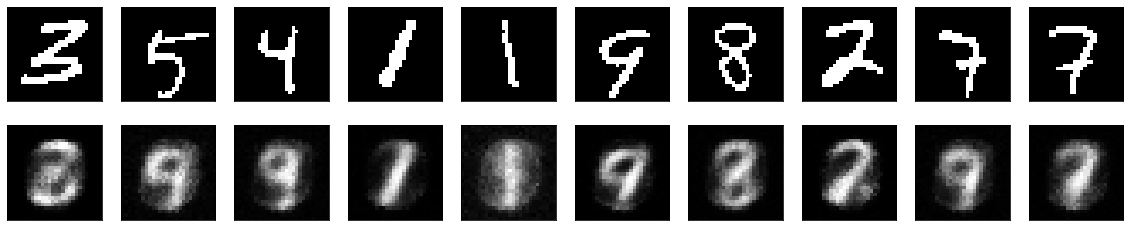

In [28]:
plot_images(X_test[:10, :], prediction120[:10, :])
plt.savefig('images120.png')
plt.show()   

In [29]:
mse50 = mean_squared_error(X_test, prediction50)
mse80 = mean_squared_error(X_test, prediction80)
mse120 = mean_squared_error(X_test, prediction120)
print("MSE 50:", mse50)
print("MSE 80:", mse80)
print("MSE 120:", mse120)

MSE 50: 0.06662238075484948
MSE 80: 0.06400368159207968
MSE 120: 0.06096233084936426


In [33]:
w50 = autoencoder50.get_weights()[0]
w80 = autoencoder80.get_weights()[0]
w120 = autoencoder120.get_weights()[0]

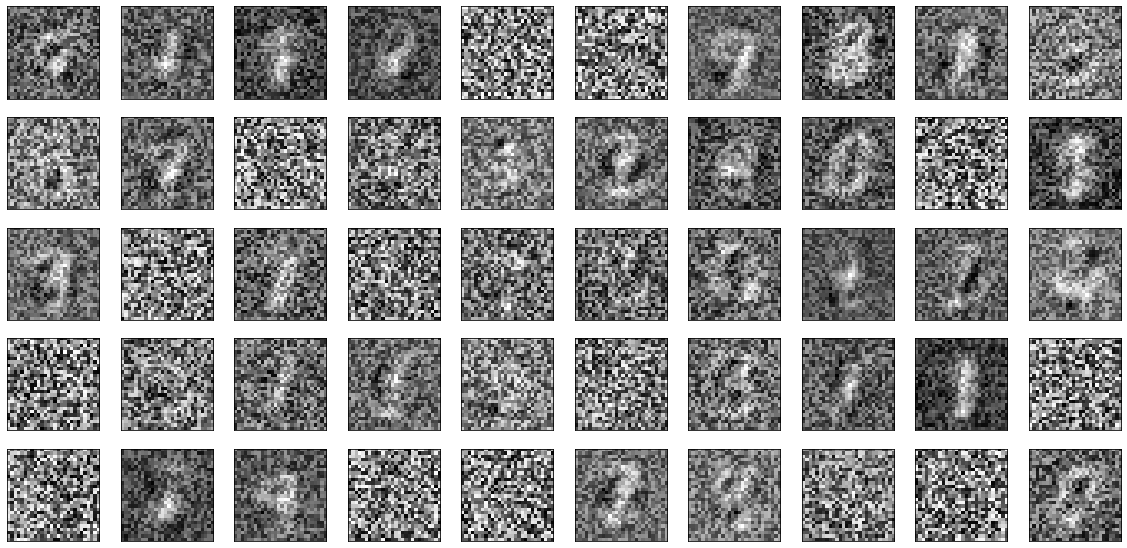

<Figure size 432x288 with 0 Axes>

In [37]:
plotWeights(w50.T)
plt.savefig('weights50.png')
plt.show()

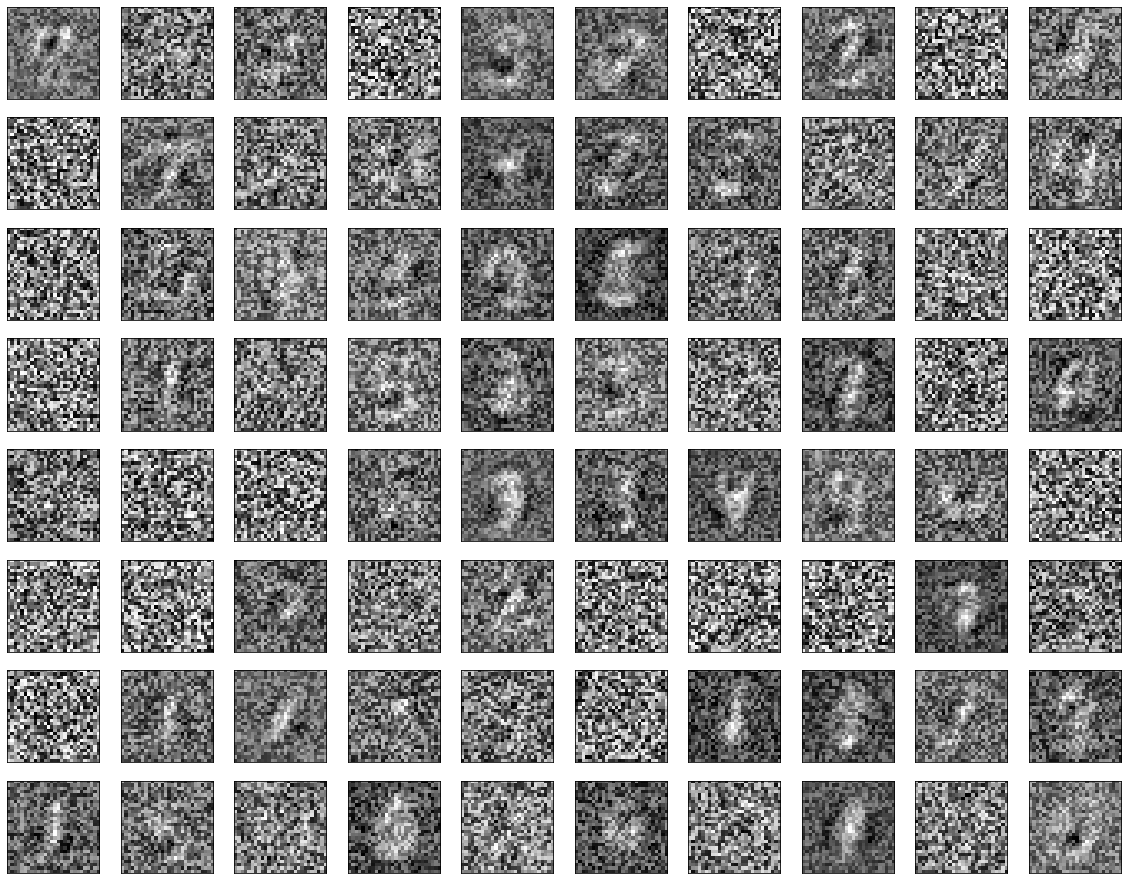

<Figure size 432x288 with 0 Axes>

In [38]:
plotWeights(w80.T)
plt.savefig('weights80.png')
plt.show()

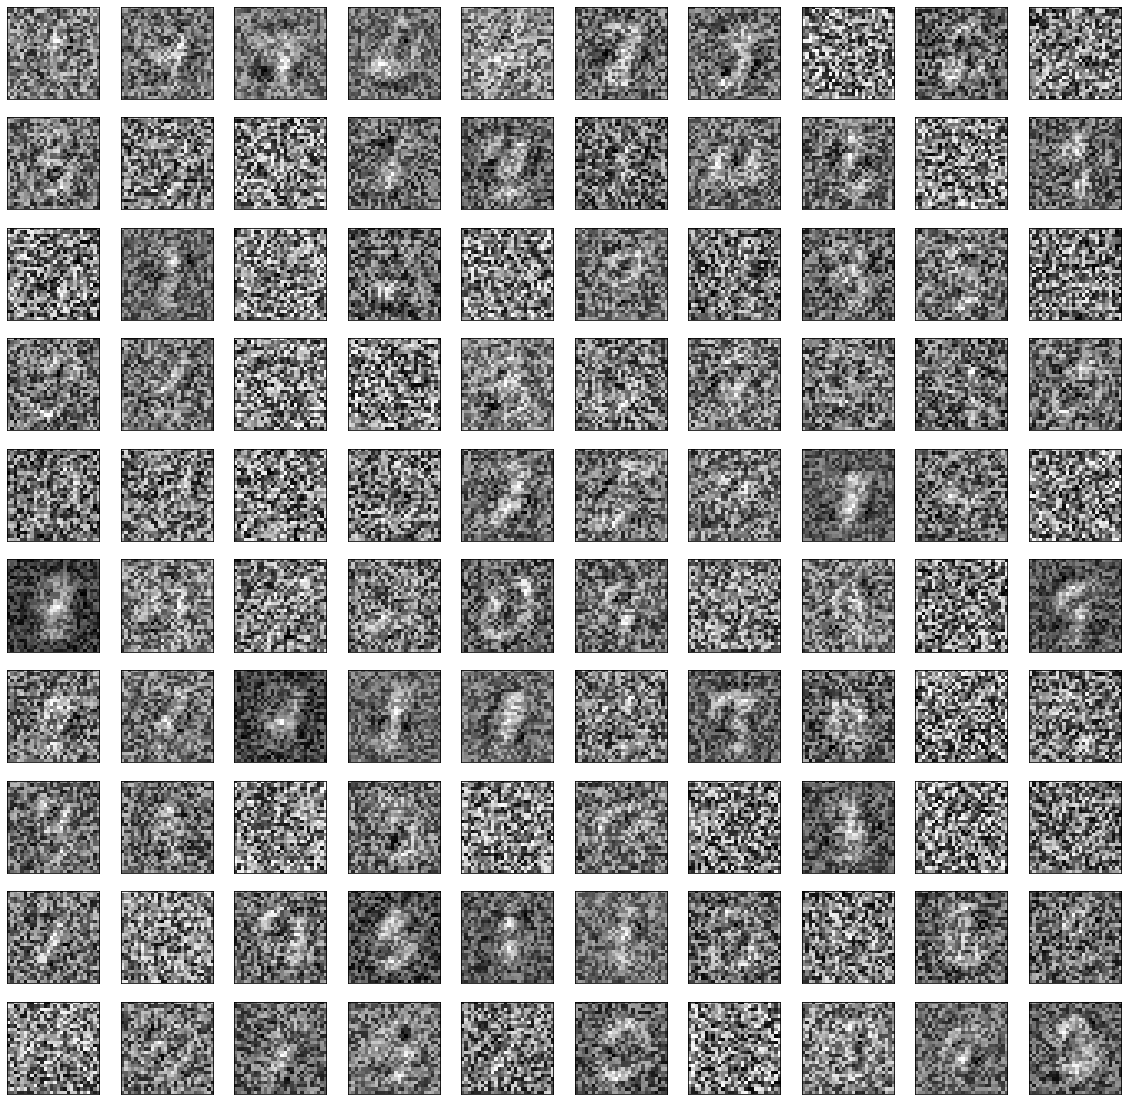

<Figure size 432x288 with 0 Axes>

In [39]:
plotWeights(w120.T)
plt.savefig('weights120.png')
plt.show()